# Generate by inferring the trained model (generator)


## Import librairies

In [ ]:
import numpy as np
from numpy import asarray
from numpy.random import randn
from numpy.random import randint
from numpy import linspace
from tensorflow.keras.models import load_model
from matplotlib import pyplot
from PIL import Image
import PIL
from matplotlib.pyplot import imsave
from matplotlib.pyplot import cm
import io
import imageio
import matplotlib.pyplot as plt

## Import your model
select your generator.h5 file

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

create a folder for the outputs

In [ ]:
!mkdir images

mkdir: cannot create directory ‘images’: File exists


## Functions

a group of functions for:
- generating vectors in the latent space
- interpolating between vectors
- plotting outputs as images

In [ ]:
# generate points (vectors) in latent space as input for the generator

def generate_latent_points(latent_dim, n_samples, n_classes=10):
    # generate points in the latent space
    x_input = randn(latent_dim * n_samples)
    # reshape into a batch of inputs for the network
    z_input = x_input.reshape(n_samples, latent_dim)
    return z_input

    '''
    latent_dim is the size of the vector
    n_sample is the number of desired points
    '''

# uniform interpolation between two points in latent space

def interpolate_points(p1, p2, n_steps):
    # interpolate ratios between the points
    ratios = linspace(0, 1, num=n_steps)
    # linear interpolate vectors
    vectors = list()
    for ratio in ratios:
        v = (1.0 - ratio) * p1 + ratio * p2
        vectors.append(v)
    return asarray(vectors)

# plot images

def plot_generated(img, n):
    # plot all n images
    plt.figure()

    for i in range(n):
        pyplot.subplot(1, n, i+1)
        pyplot.axis('off')
        pyplot.imshow(img[i])
        imsave("images/image_%02d.png" % i, img[i])

    # plot first image
    plt.figure()
    pyplot.subplot(1, 3, 1)
    pyplot.axis('off')
    pyplot.imshow(img[0])
    plt.title("image_00")

    # plot mid image
    pyplot.subplot(1, 3, 2)
    pyplot.axis('off')
    pyplot.imshow(img[int(n/2)])
    if int(n/2) < 10 :
      plt.title('image_0'+str(int(n/2)))
    else : 
      plt.title('image_'+str(int(n/2)))
    
    # plot last image
    pyplot.subplot(1, 3, 3)
    pyplot.axis('off')
    pyplot.imshow(img[int(n-1)])
    if int(n-1) < 10 :
      plt.title('image_0'+str(int(n-1)))
    else : 
      plt.title('image_'+str(int(n-1)))




## Inference

(3, 100)


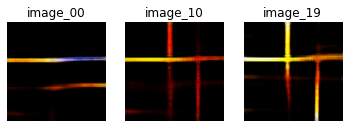

In [ ]:
# Refresh output directory
!rm -r images/
!mkdir images

# create a plot of generated images
size = 128

# load model
model = load_model('generator.h5')

# generate points (vectors) in latent space
pts = generate_latent_points(100, 2)
print(pts.shape)

# interpolate points in latent space
nb_img = 20
interpolated = interpolate_points(pts[0], pts[1], nb_img)

# generate images (INFERENCE)
# ------------------------------
X = model.predict(interpolated)
# ------------------------------

# scale from [-1,1] to [0,1]
X = (X + 1) / 2.0


# plot the result
plot_generated(X, len(interpolated))


### download the job!

In [ ]:
import shutil
shutil.make_archive('inference','zip','/content/images')
files.download('inference.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Super Resolution

In [ ]:
import os
import time
from PIL import Image
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
os.environ["TFHUB_DOWNLOAD_PROGRESS"] = "True"

In [ ]:
# Declaring Constants
IMAGE_PATH = "/content/images/"
SAVED_MODEL_PATH = "https://tfhub.dev/captain-pool/esrgan-tf2/1"

In [ ]:
def preprocess_image(image_path):
  """ Loads image from path and preprocesses to make it model ready
      Args:
        image_path: Path to the image file
  """
  hr_image = tf.image.decode_image(tf.io.read_file(image_path))
  # If PNG, remove the alpha channel. The model only supports
  # images with 3 color channels.
  if hr_image.shape[-1] == 4:
    hr_image = hr_image[...,:-1]
  hr_size = (tf.convert_to_tensor(hr_image.shape[:-1]) // 4) * 4
  hr_image = tf.image.crop_to_bounding_box(hr_image, 0, 0, hr_size[0], hr_size[1])
  hr_image = tf.cast(hr_image, tf.float32)
  return tf.expand_dims(hr_image, 0)

def save_image(image, filename):
  if not isinstance(image, Image.Image):
    image = tf.clip_by_value(image, 0, 255)
    image = Image.fromarray(tf.cast(image, tf.uint8).numpy())
  image.save("%s.jpg" % filename)
  # print("Saved as %s.jpg" % filename)

In [ ]:
%matplotlib inline
def plot_image(image, title=""):
  image = np.asarray(image)
  image = tf.clip_by_value(image, 0, 255)
  image = Image.fromarray(tf.cast(image, tf.uint8).numpy())
  plt.figure()
  plt.imshow(image)
  plt.axis("off")
  plt.title(title)

In [ ]:
model = hub.load(SAVED_MODEL_PATH)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


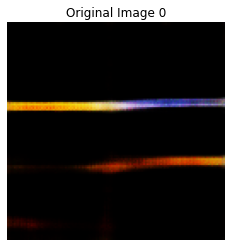

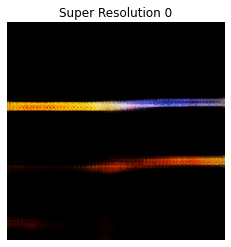

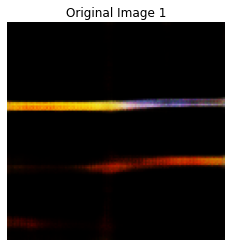

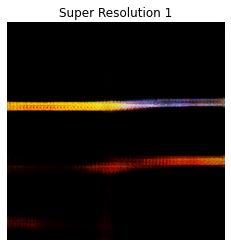

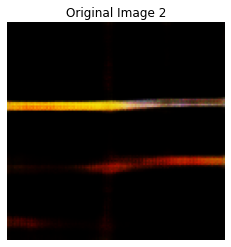

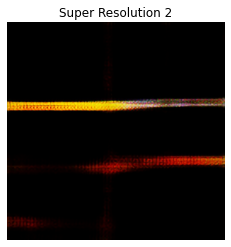

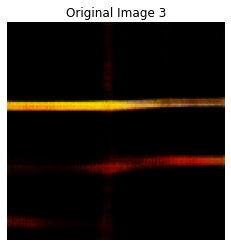

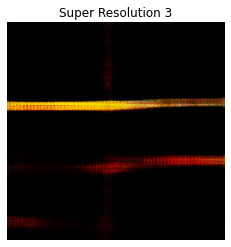

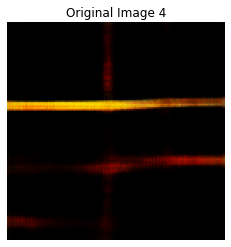

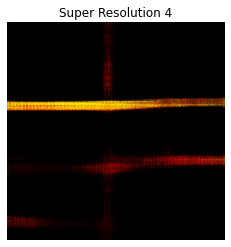

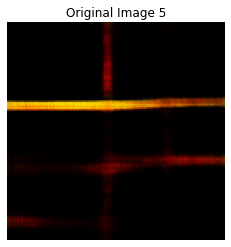

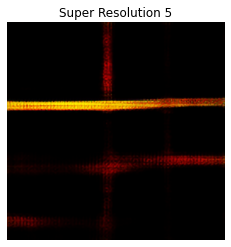

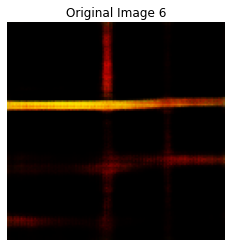

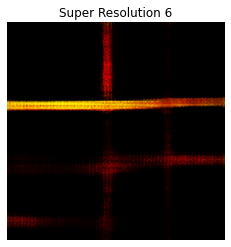

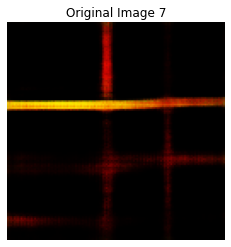

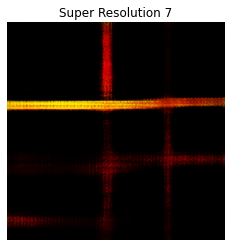

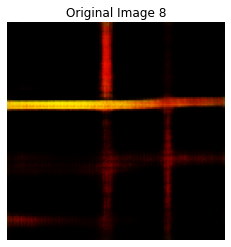

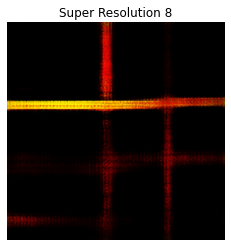

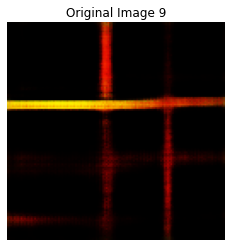

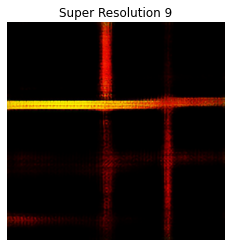

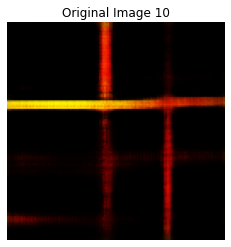

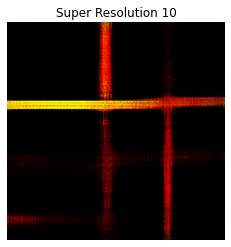

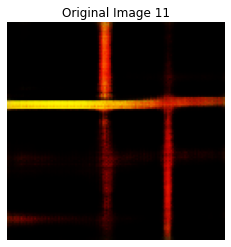

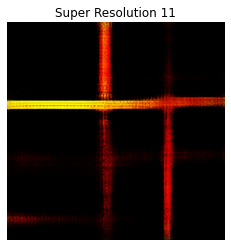

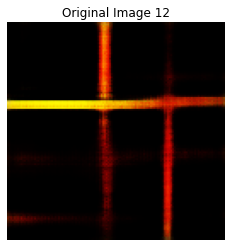

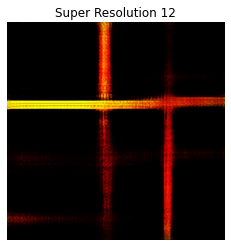

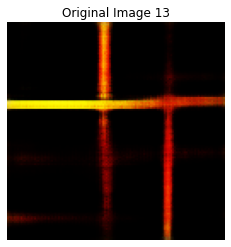

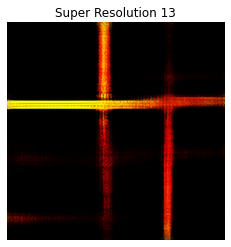

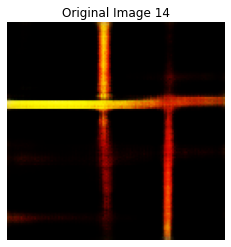

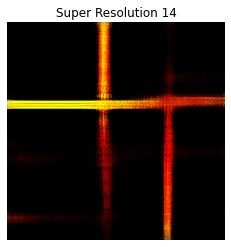

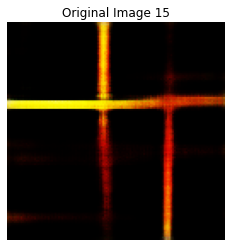

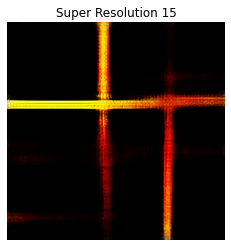

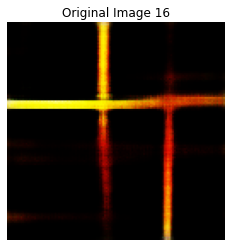

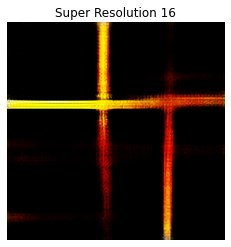

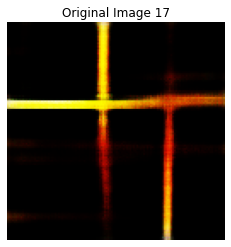

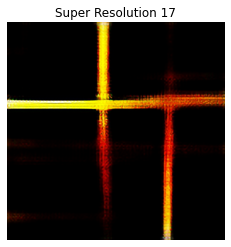

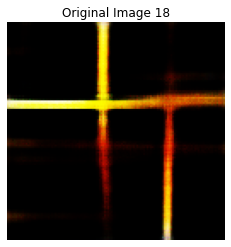

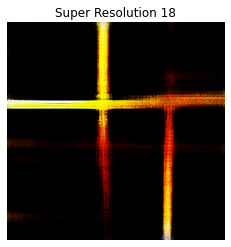

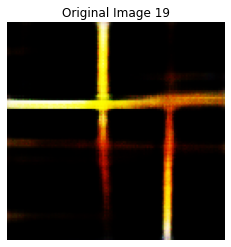

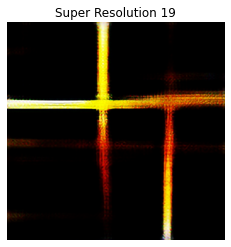

In [ ]:
for i in range (0,nb_img):
  if (i<10) :
    IMAGE_PATH = "/content/images/image_0"+str(i)+".png"
  else :
    IMAGE_PATH = "/content/images/image_"+str(i)+".png"

  hr_image = preprocess_image(IMAGE_PATH)

  # Plotting Original Resolution image
  plot_image(tf.squeeze(hr_image), title="Original Image "+str(i))
  save_image(tf.squeeze(hr_image), filename="Original Image "+str(i))
  start = time.time()
  fake_image = model(hr_image)
  fake_image = tf.squeeze(fake_image)
  # print("Time Taken: %f" % (time.time() - start))
  # Plotting Super Resolution Image
  plot_image(tf.squeeze(fake_image), title="Super Resolution "+str(i))
  save_image(tf.squeeze(fake_image), filename="images/Super Resolution "+str(i))

download enhanced images

In [ ]:
from google.colab import files

shutil.make_archive('superresolution','zip','/content/images/')
files.download('superresolution.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>